<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum%204/regresi_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
    )

In [7]:
path = '/content/drive/MyDrive/Praktikum ML/Praktikum 4/data'

In [8]:
df = pd.read_csv(path +'/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [10]:
# Cek Missing Value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [11]:
df.duplicated().sum()

np.int64(7308)

In [12]:
df['Stunting'].unique()

array(['Tall', 'Stunted', 'Normal', 'Severely Stunted'], dtype=object)

In [13]:
df['Jenis Kelamin'].unique()

array(['Laki-laki', 'Perempuan'], dtype=object)

In [14]:
stunt_map = {'Stunted': 1, 'Severely Stunted': 1, 'Normal': 0, 'Tall': 0}
df['Stunting_bin'] = df['Stunting'].map(stunt_map).astype(int)

df['Jk_bin'] = (df['Jenis Kelamin'] == 'Laki-laki').astype(int)

print(f"Distribusi Stunting_bin:\n{df['Stunting_bin'].value_counts()}\n")
print(f"Distribusi Jk_bin:\n{df['Jk_bin'].value_counts()}\n")

Distribusi Stunting_bin:
Stunting_bin
0    78021
1    21979
Name: count, dtype: int64

Distribusi Jk_bin:
Jk_bin
1    50179
0    49821
Name: count, dtype: int64



In [15]:
corr_matriks = df.corr(numeric_only=True)
corr_matriks

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting_bin,Jk_bin
Umur (bulan),1.000000,0.875869,0.665389,0.038630,0.004046
Tinggi Badan (cm),0.875869,1.000000,0.626005,-0.283855,0.073505
Berat Badan (kg),0.665389,0.626005,1.000000,0.021090,0.045797
Stunting_bin,0.038630,-0.283855,0.021090,1.000000,-0.005981
Jk_bin,0.004046,0.073505,0.045797,-0.005981,1.000000


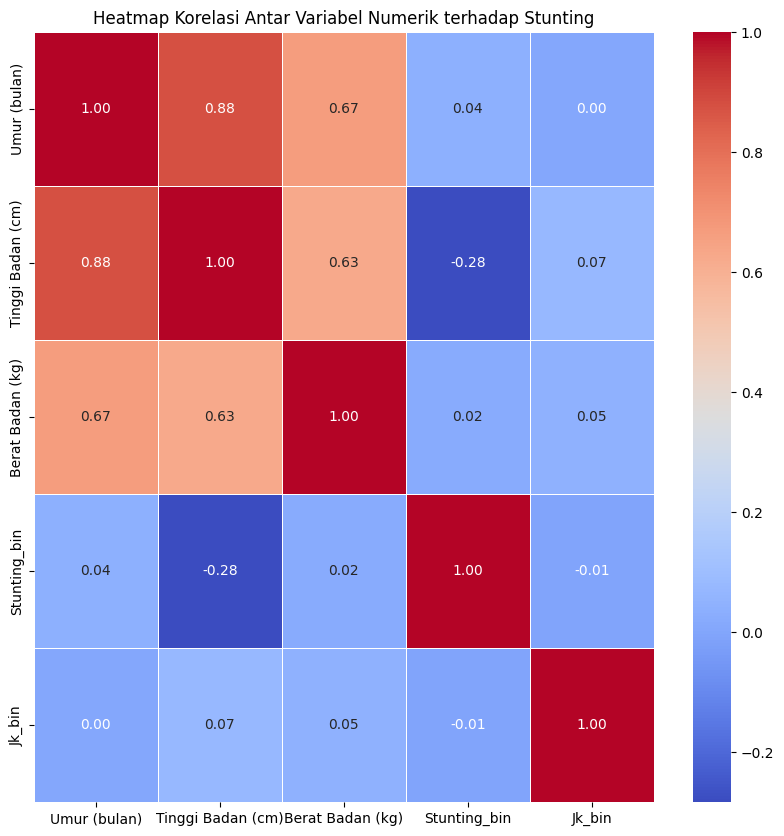

In [16]:
import seaborn as snb

plt.figure(figsize=(10, 10))
snb.heatmap(corr_matriks, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap Stunting', fontsize=12)
plt.show()

In [17]:
# Fitur numerik dan gender
feature_num = ['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']
feature_bin = ['Jk_bin']

#Gabungkan & drop missing
use_cols = feature_num + feature_bin + ['Stunting_bin']
df_model = df[use_cols].dropna().copy()

X = df_model[feature_num + feature_bin]
y = df_model['Stunting_bin']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100000, 4)
y shape: (100000,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data latih:", X_train.shape, y_train.shape)
print("Data uji:", X_test.shape, y_test.shape)

Data latih: (80000, 4) (80000,)
Data uji: (20000, 4) (20000,)


In [19]:
# Scale hanya fitur numerik, gender langsung passthough
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs',
    class_weight='balanced'
)

clf = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('model', model)
    ]
)

# Latih Model
clf.fit(X_train, y_train)
print("Model Logistic Regression sudah dilatih!")

Model Logistic Regression sudah dilatih!


In [20]:
# Prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

# Evaluasi
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
#

Akurasi: 0.9055
Presisi: 0.7152
Recall: 0.9472
F1 Score: 0.8150
ROC AUC Score: 0.9656


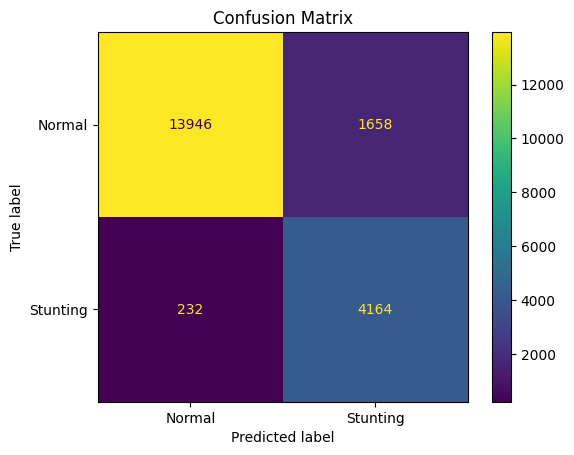

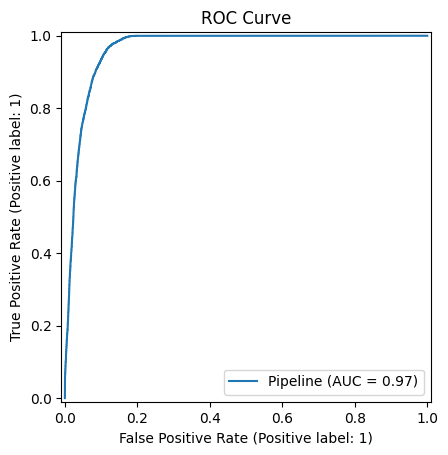

In [21]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Normal', 'Stunting']
                       ).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

#ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve')
plt.show()

In [22]:
print(classification_report(y_test, y_pred, target_names=['Tidak Stunting (0)', 'Stunting (1)']))

                    precision    recall  f1-score   support

Tidak Stunting (0)       0.98      0.89      0.94     15604
      Stunting (1)       0.72      0.95      0.82      4396

          accuracy                           0.91     20000
         macro avg       0.85      0.92      0.88     20000
      weighted avg       0.92      0.91      0.91     20000



In [23]:
# Lakukan  cross validation (cv=5 berarti 5-fold)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi akurasi:", np.std(scores))

Skor tiap fold: [0.9062  0.9013  0.9052  0.89905 0.9002 ]
Rata-rata akurasi: 0.9023899999999999
Standar deviasi akurasi: 0.0028125433329995106


In [24]:
# Ambil nama fitur & koefisien
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Nama Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio': odds
}).sort_values('Odds Ratio', ascending=False)

display(coef_df)

,Nama Fitur,Koefisien (log-odds),Odds Ratio
0,Umur (bulan),8.525912,5043.782458
3,Jk_bin,1.675944,5.343839
2,Berat Badan (kg),0.661090,1.936903
1,Tinggi Badan (cm),-10.535980,0.000027


In [25]:
# Contoh 2 anak
data_baru = pd.DataFrame({
    'Umur (bulan)': [24, 10],
    'Tinggi Badan (cm)': [79.0, 72.5],
    'Berat Badan (kg)': [9.2, 7.8],
    'Jk_bin': [1, 0] # 1=laki-laki, 0=Perempuan
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:,1]

hasil = data_baru.copy()
hasil['Prob_Stunting'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred
display(hasil)

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Jk_bin,Prob_Stunting,"Pred (0=Tidak,1=Ya)"
0,24,79.0,9.2,1,0.998208,1
1,10,72.5,7.8,0,0.002094,0
